<a href="https://colab.research.google.com/github/neeshanth/EDA-TH-DA-1/blob/main/mod6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Singular Value Decomposition

Singular Values (Σ):
[40.01777347 33.06831068]


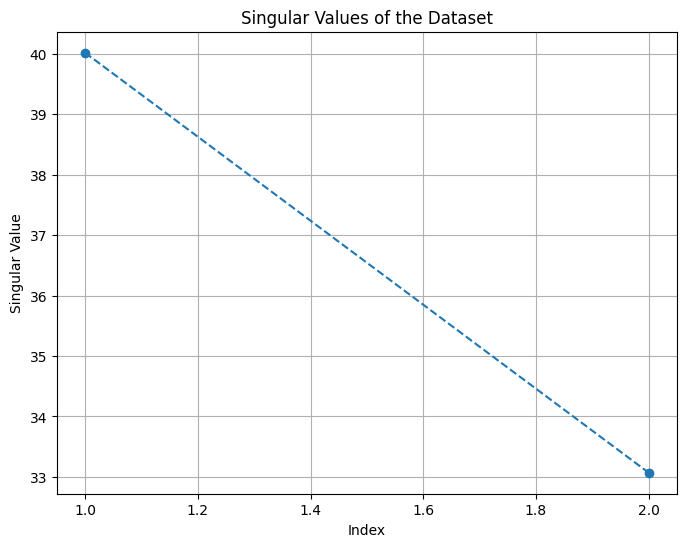

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

file_path = "/content/HepatitisCdata.csv"
data = pd.read_csv(file_path)

# dropping rows with missing values
data_clean = data.dropna()

numerical_columns = data_clean.select_dtypes(include=['float64', 'int64']).columns
X = data_clean[numerical_columns]

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Singular Value Decomposition (SVD)
svd = TruncatedSVD(n_components=2)  # You can adjust the number of components
X_svd = svd.fit_transform(X_scaled)

print("Singular Values (Σ):")
print(svd.singular_values_)

# explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(svd.singular_values_) + 1), svd.singular_values_, marker='o', linestyle='--')
plt.title("Singular Values of the Dataset")
plt.xlabel("Index")
plt.ylabel("Singular Value")
plt.grid(True)
plt.show()

# Factor Analysis

Factor Loadings:
[[ 0.3238238   0.21338294 -0.28884577  0.46934973  0.20139852  0.54410769
   0.29139143 -0.21876323 -0.07045435  0.12266453  0.89060745 -0.14138567]
 [ 0.36201821  0.15486189 -0.56781422 -0.17282751 -0.31957291  0.10180719
   0.26970878 -0.63314985 -0.46682043 -0.03375589 -0.17036231 -0.5222416 ]]


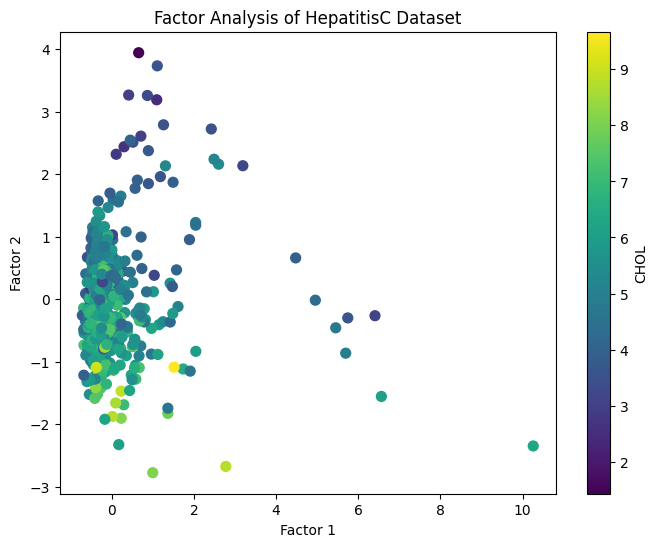

In [5]:
import pandas as pd
import numpy as np
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Perform Factor Analysis
fa = FactorAnalysis(n_components=2)
X_fa = fa.fit_transform(X_scaled)

# Print factor loadings
print("Factor Loadings:")
print(fa.components_)

# Plot the factor analysis results
plt.figure(figsize=(8, 6))
plt.scatter(X_fa[:, 0], X_fa[:, 1], c=data_clean['CHOL'], cmap='viridis', s=50)
plt.title("Factor Analysis of HepatitisC Dataset")
plt.xlabel("Factor 1")
plt.ylabel("Factor 2")
plt.colorbar(label='CHOL')
plt.show()

# Intrinsic Dimensionality

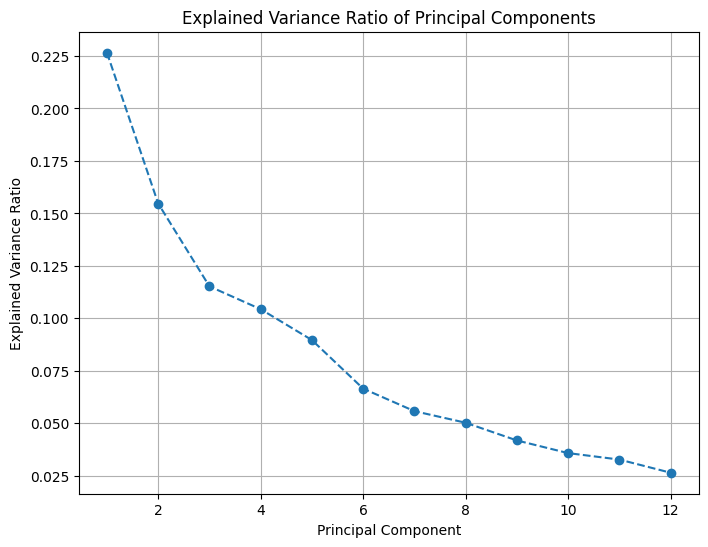

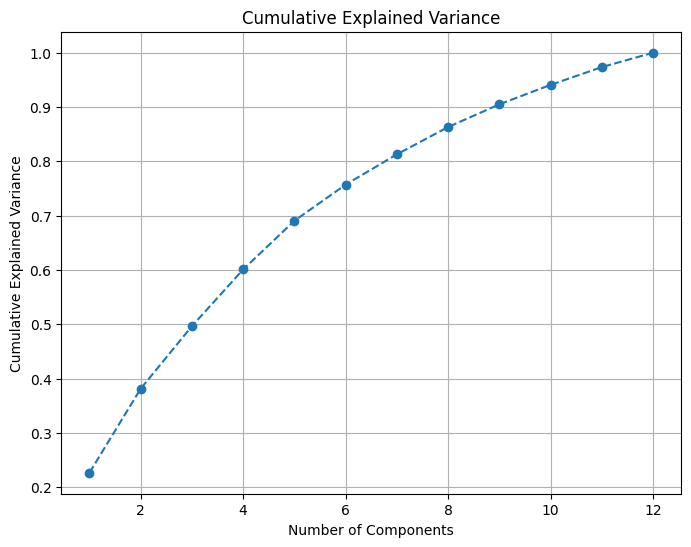

Estimated Intrinsic Dimensionality (95% variance explained): 11


In [6]:
from sklearn.decomposition import PCA

# Apply PCA to the data
pca = PCA(n_components=X_scaled.shape[1])
pca.fit(X_scaled)

# Explained variance ratio (indicates how much of the variance is captured by each component)
explained_variance_ratio = pca.explained_variance_ratio_

# explained variance ratio to visualize intrinsic dimensionality
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.title("Explained Variance Ratio of Principal Components")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.grid(True)
plt.show()

# intrinsic dimensionality based on cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratio)
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title("Cumulative Explained Variance")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()

# Find the number of components that explain
threshold = 0.95
num_components = np.argmax(cumulative_variance >= threshold) + 1
print(f"Estimated Intrinsic Dimensionality (95% variance explained): {num_components}")